## Source Code
ADD LINK HERE

## Implementing Perceptron

The perceptron update was implemented using: $$\mathbf{\tilde{w}}^{(t+1)}=\mathbf{\tilde{w}}^{(t)}+\mathbb{1}(y_i\langle\mathbf{\tilde{w}}^{(t)}\mathbf{,\tilde{x}}_i\rangle<0)y_i\mathbf{\tilde{x}}_i$$(Equation 1 in [Implementing the Perceptron Algorithm]
(https://middlebury-csci-0451.github.io/CSCI-0451/assignments/blog-posts/blog-post-perceptron.html#source-code)). This update works by calculating the dot product of the current weights and the features of the selected point and then multiplying it by the true label of that point. If the signs of the dot product and the label are different then the weights are updated, otherwise the weights remain the same. In the case that an update does occur, the new weights are calculated by multiplying the features of the selected point by the actual label and adding that to the current weights. Since we multiply the selected points features' by the point's true label, we are always moving our weights in the direction of that label, improving the perceptron's ability to classify that specific point. By iterating through the points randomly and performing updates, the perceptron algorithm eventually converges if the data is linearly separable.

## Testing the Algorithm
Three experiments were performed to verify that the perceptron algorithm was implemented correctly.

### Experiment 1: Linearly Separable Data
First the perceptron was fit on linearly separable data with two features.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from perceptron import Perceptron

100 data points were generated, each with two features and a label of 1 or 0. The data was designed to be linearly separable (meaning the perceptron should converge if run for long enough).

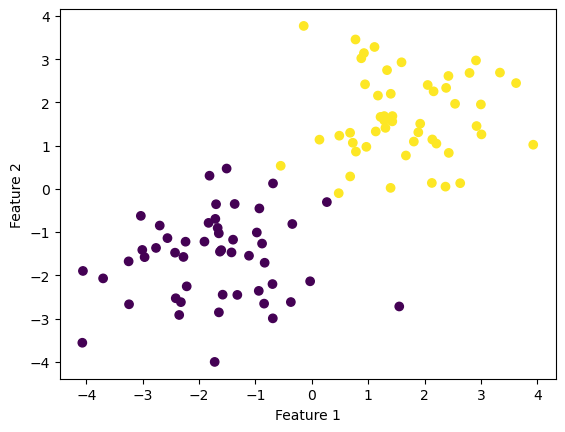

In [2]:
np.random.seed(12345)

n = 100
p_features = 3

X, y = make_blobs(n_samples = 100, n_features = p_features - 1, centers = [(-1.7, -1.7), (1.7, 1.7)])

fig = plt.scatter(X[:,0], X[:,1], c = y)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

The algorithm was fit to the data with a maximum of 1000 iterations.

In [3]:
p = Perceptron()
p.fit(X, y, max_steps = 1000)

If we print the weight vector, we see three values. The first value is the weight of feature 1, the second is the weight of feature 2, and the third is the bias.

In [4]:
p.w

array([2.10557404, 3.1165449 , 0.25079936])

We can also plot the accuracy as the model is fit.

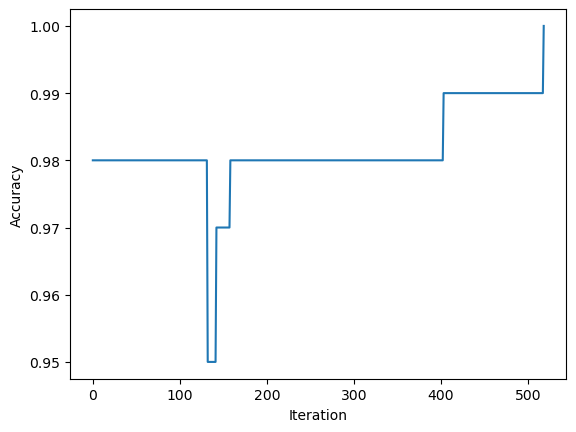

In [5]:
fig = plt.plot(p.history)
xlab = plt.xlabel("Iteration")
ylab = plt.ylabel("Accuracy")

If we print the accuracy, we see that it is 1.0, we classified all of our data correctly!

In [6]:
p.score(X, y)

1.0

We see this too when we draw the line specified by our weights. The line perfectly separates the two types of data.

(-4.0, 4.0)

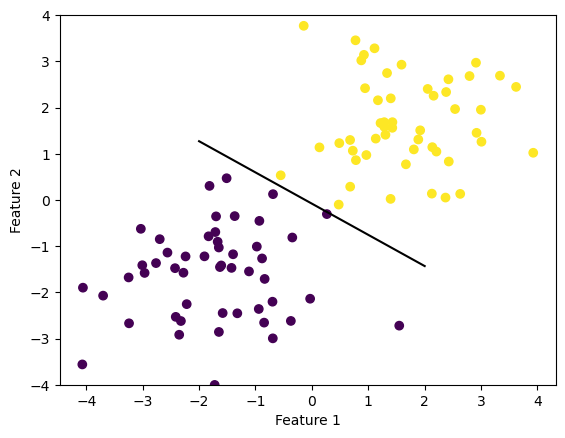

In [7]:
def draw_line(w, x_min, x_max):
  x = np.linspace(x_min, x_max, 101)
  y = -(w[0]*x + w[2])/w[1]
  plt.plot(x, y, color = "black")

fig = plt.scatter(X[:,0], X[:,1], c = y)
fig = draw_line(p.w, -2, 2)

xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")
plt.ylim([-4,4])

### Experiment 2: Not Linearly Separable Data
Next let's see how our algorithm runs on data that isn't linearly separable. First we'll define some new data. We still have 100 points, each with two features and a label, but when we visualize the data below we can see that it is not clustered as nicely.

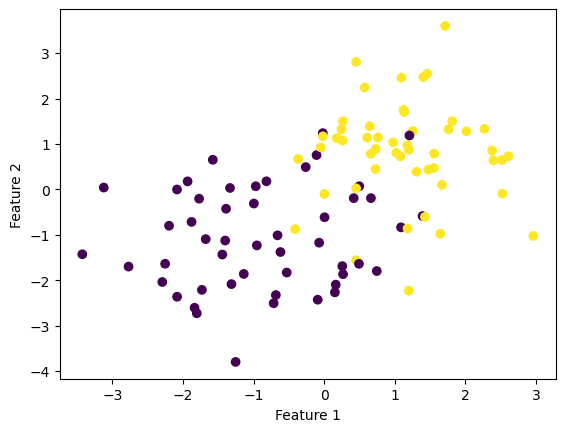

In [8]:
np.random.seed(123)

p_features = 3

X, y = make_blobs(n_samples = 100, n_features = p_features - 1, centers = [(-1, -1), (1, 1)])

fig = plt.scatter(X[:,0], X[:,1], c = y)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

A new perceptron was fit and the weights were printed. Like with Experiment 1, we see a weight vector with three values.

In [9]:
p2 = Perceptron()
p2.fit(X, y, max_steps = 1000)
p2.w

array([ 3.25206473,  1.64360407, -1.10792451])

When we plot and print the accuracy over time, we see that we were able to achieve an accuracy of 0.89 after 1000 runs. This makes sense, as an accuracy of 1.0 is required for the algorithm to end early, which is impossible on this dataset.

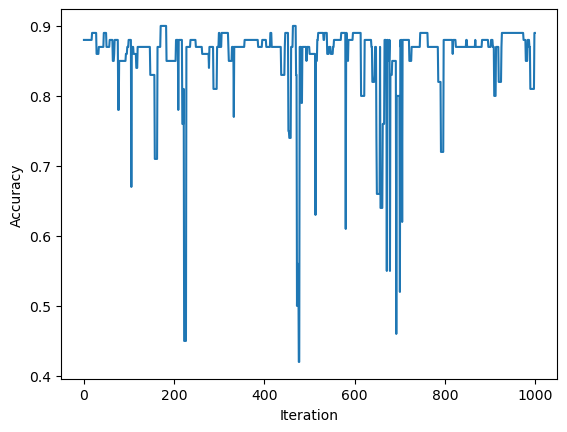

In [10]:
fig = plt.plot(p2.history)
xlab = plt.xlabel("Iteration")
ylab = plt.ylabel("Accuracy")

In [11]:
p2.score(X,y)

0.89

When we visualize the line that the perceptron specified, we see that it's pretty good. It seems unlikely that the accuracy could get much better on this dataset.

(-3.5, 3.5)

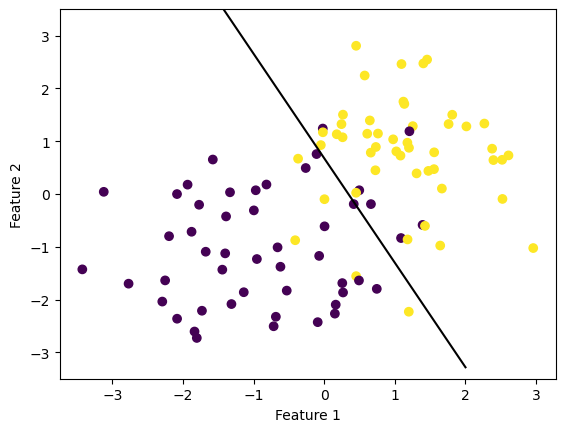

In [12]:
fig = plt.scatter(X[:,0], X[:,1], c = y)
fig = draw_line(p2.w, -2, 2)

xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")
plt.ylim([-3.5,3.5])

### Experiment 3: Data with More than 2 Features
For the last experiment we see if the perceptron can classify data with more than two features. I generated a dataset of 100 points, still with binary labels, but this time each data point has five features.

In [13]:
X, y = make_blobs(n_samples = 100, n_features = 5, centers = 2)

Now when we fit our perceptron and print the weights we get a six element vector, where the first five values correspond to the features and the final value corresponds to the bias. Our perceptron generalizes to data with more than two features!

In [14]:
p3 = Perceptron()
p3.fit(X,y,max_steps = 1000)
p3.w

array([ 2.02291666,  6.08425872,  0.74441411,  5.17387787, 10.87406143,
       -1.69055338])

When we plot and print the accuracy of our perceptron we see that we achieve a loss of 1.0. This suggests that the dataset I generated is linearly separable.

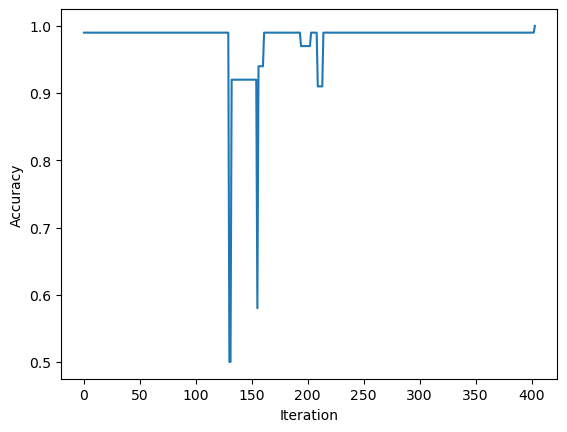

In [15]:
fig = plt.plot(p3.history)
xlab = plt.xlabel("Iteration")
ylab = plt.ylabel("Accuracy")

In [16]:
p3.score(X,y)

1.0

## Runtime of the Perceptron Update

Each perceptron update (see Equation 1) is performed on only one data point, so the runtime of a single update is independent of the number of data points in the provided dataset. Performing the dot product $\langle\mathbf{\tilde{w}}^{(t)}\mathbf{,\tilde{x}}_i\rangle$ requires p+1 multiplications and p additions, for a runtime of O(p) (where p = number of features). Multiplying by a scalar increases the runtime of $\mathbb{1}(y_i\langle\mathbf{\tilde{w}}^{(t)}\mathbf{,\tilde{x}}_i\rangle<0)$ to $O(p^2)$. We then multiply that whole term by $y_i\mathbf{\tilde{x}}_i$, a scalar and a vector, for a runtime of $O(p^4)$. Adding the update term to the previous weight takes O(p+1), for a total runtime of $O(p^4+p+1)$, which simplifies to $O(p^4)$.